## A Quick Tour of DifferentialEquations.jl

DifferentialEquations.jl is a metapackage for solving differential equations in Julia. The basic workflow is:

- Define a problem
- Solve a problem
- Plot the solution

The API between different types of differential equations is unified through multiple dispatch

## Example: Lotka-Volterra ODE

$$\begin{align}
x' &= ax - bxy\\
y' &= -cy + dxy
\end{align}$$

In [1]:
using DifferentialEquations
# Define a problem
const a = 1.0; const b = 2.0
const c = 1.5; const d = 1.25
f = function (t,u,du) # Define f as an in-place update into du
    du[1] = a*u[1] - b*u[1]*u[2]
    du[2] = -c*u[2]+ d*u[1]*u[2]
end
u0 = [1.0;1.0]; tspan = [0.0;10.0]
prob = ODEProblem(f,u0)

DifferentialEquations.ODEProblem{Array{Float64,1},Float64}(#1,[1.0,1.0],DifferentialEquations.#236,false,2,true)

In [2]:
# Solve the problem
sol = solve(prob,tspan)

DifferentialEquations.ODESolution, 15 timesteps, final value [1.93907,0.776886]


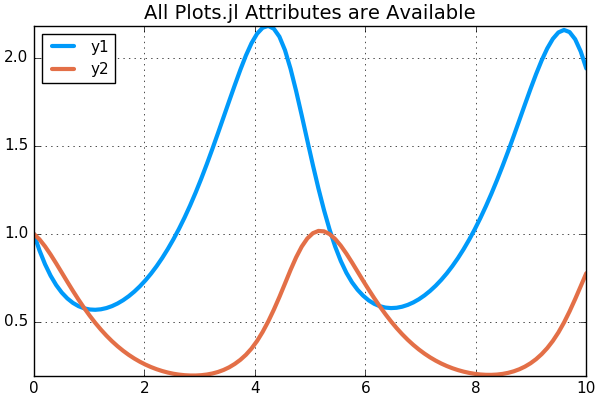

In [3]:
# Plot the solution using the plot recipe
plot(sol,title="All Plots.jl Attributes are Available")

## Extra Features

The solution object acts both as an array and as an interpolation of the solution

In [4]:
@show sol.t[3] # Time at the 3rd timestep
@show sol[3] # Value at the third timestep
@show sol(5) # Value at t=5 using the interpolation 

sol.t[3] = 0.5153590645712325
sol[3] = [0.66304,0.774866]
sol(5) = [1.46027,0.991056]


2-element Array{Float64,1}:
 1.46027 
 0.991056

## Stochastic Differential Equations

Also included are problems for stochastic differential equations


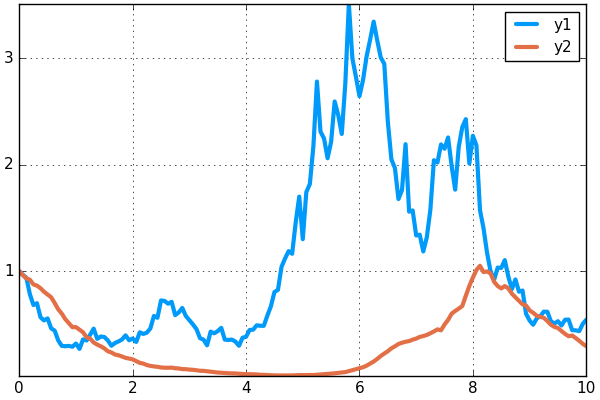

In [16]:
g = function (t,u,du)
    du[1] = .5*u[1] 
    du[2] = .1*u[2]
end
prob = SDEProblem(f,g,u0)
sol = solve(prob,Δt=1/2^4,tspan)
plot(sol)

## Documentation

For more information, see the documentation: https://github.com/JuliaDiffEq/DifferentialEquations.jl

## Problems 

### Problem 1

The DifferentialEquations.jl algorithms choose the number type of their calculation given their input. Use this fact to solve the [Lorenz equation](https://en.wikipedia.org/wiki/Lorenz_system) using BigFloats. You may want to [check out the example notebooks](https://github.com/JuliaDiffEq/DifferentialEquations.jl/tree/master/examples).



### Problem 2

Use the [event handling](http://juliadiffeq.github.io/DifferentialEquations.jl/latest/man/callback_functions.html) the model a bouncing ball with friction, i.e. at every bounce the velocity flips but is decreased to 80%. Does the ball eventually stop bouncing?

### Problem 3 

Install the ODE.jl and ODEInterface conditional dependencies (note: ODEInterface may give build issues on Windows!) and run some of the [benchmarks notebooks](https://github.com/JuliaDiffEq/DifferentialEquations.jl/tree/master/benchmarks) on your machine. Do you notice any trends amongst the algorithms? Use the method as shown in the Pleiades benchmarks to benchmark the algorithms against each other on nonlinear problems with no known analytical solution. Try building an example problem with a large number of independent variables to accentuate the differences between the algorithms (Example: the Linear problem in the benchmarks is a 100x100 problem).